# Introduction and Dataset

## 1. Very basic introduction to particle physics

In this section we will learn about what particle physics is, where data comes from, what the data is, why it is interesting and how it is described. This is relevant to understand the dataset that will be introduced in Part 2.


### 1.1 The Standard Model 

In particle physics we work with the smallest building blocks of nature and study the fundamental forces that make up our universe. The mathematical model that describes the building blocks or fundamental particles as well as the forces is called the Standard model. 

A very quick and illustrative explanation can be found in this video: https://www.youtube.com/watch?v=ehHoOYqAT_U

### 1.2 Particle Accelarators and the Large Hadron Collider 

In the video you already watched you learned what the fundamental particles are: 6 quarks (including the up- and down-quark that make up protons and neutrons), 6 leptons (including the electron), 4 fource carriers (photon, gluon and the W- and Z-boson), and the Higgs boson that plays a special role. 

To study the properties of these particles we need large particle accelerators that take for example two protons, accelerate them to almost the speed of light and make them collide. Due do the large amount of energy new particles are created in the collision and interact with each other. The biggest particle accelerator in the world is the Large Hadron Collider (LHC) at CERN in Geneva, Switzerland. 

A funny illustration of such a collision can be found in this video https://www.youtube.com/watch?v=BEnaEMMAO_s 

### 1.3 Detector and Experiment

In order to study the particles and their interactions that were produced in such a collision we need to somehow "catch" them. 
For this purpose the LHC has 4 large scale detectors placed along the ring of which the biggest ones are ATLAS and CMS. Just to get an idea, ATLAS is 46 m long and has a diameter of 25 meters. 

Particles produced in the collision leave traces in the detector. An example of such a detector response is given below, you can see the collision in the center where the red lines, tracks of charged particles, orginate. The boxes are "active" detector cells, meaning particles passed there and left their energy. 

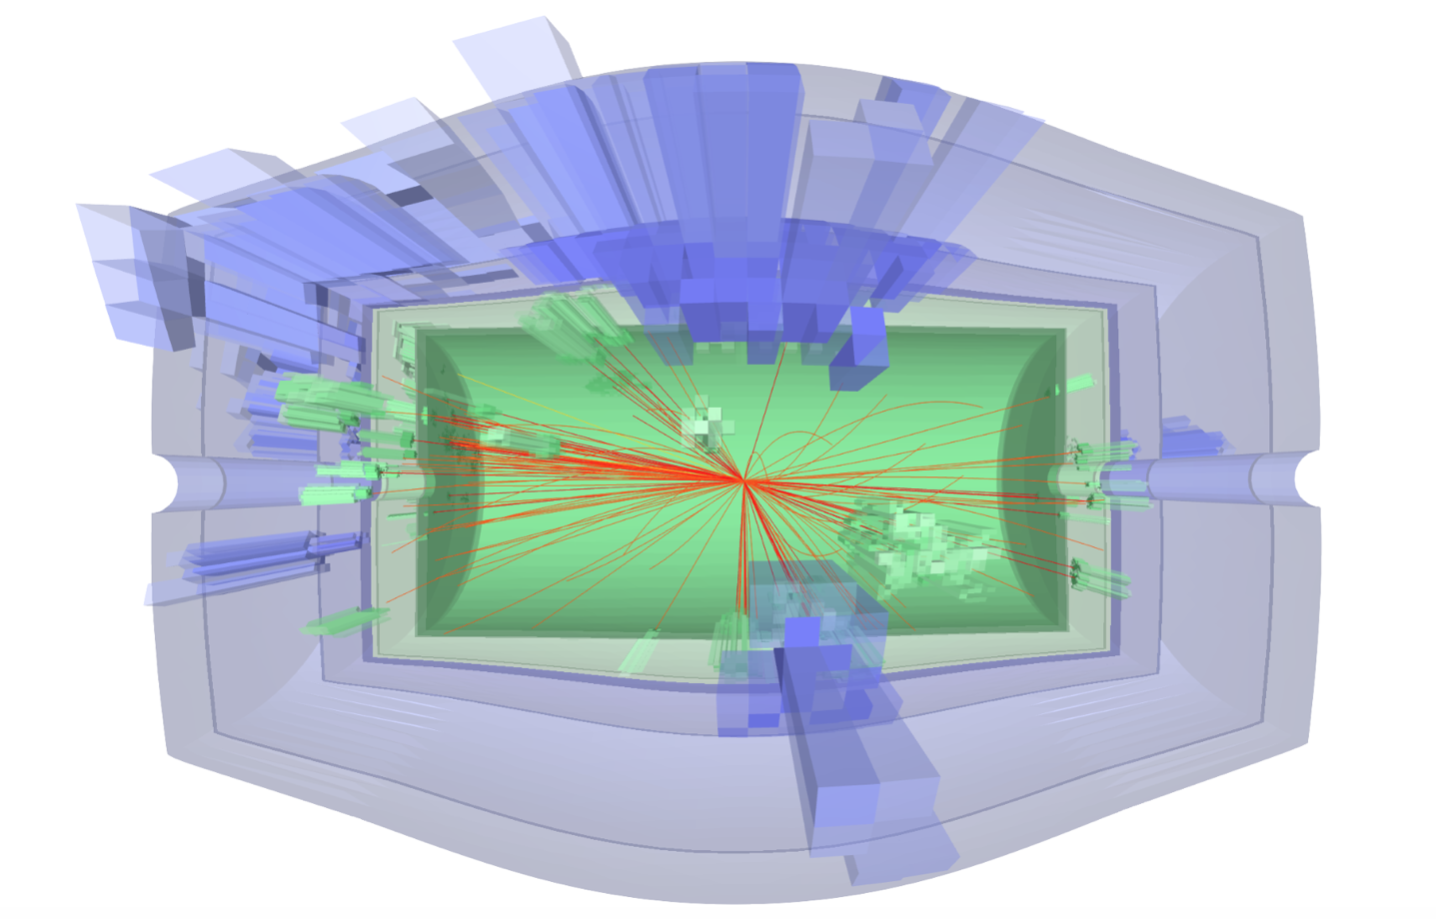

In [4]:
from IPython.display import Image, display
display(Image(filename='img/cocoa_det.png', embed=True, width=500))

We are in generally interested in the fundamental particle created in the collision, however their lifetime is very short and they can't exist outside a compound (a single quark can't exist in nature, only as compound with other quarks). So the particles form compounds and decay into stable particles before they even enter the detector. This is illustrated in the image below.

**This puts us in front of a challanging task: given the set of particles we measure in our detector, we need to understand which fundamental particles  caused this detector response**



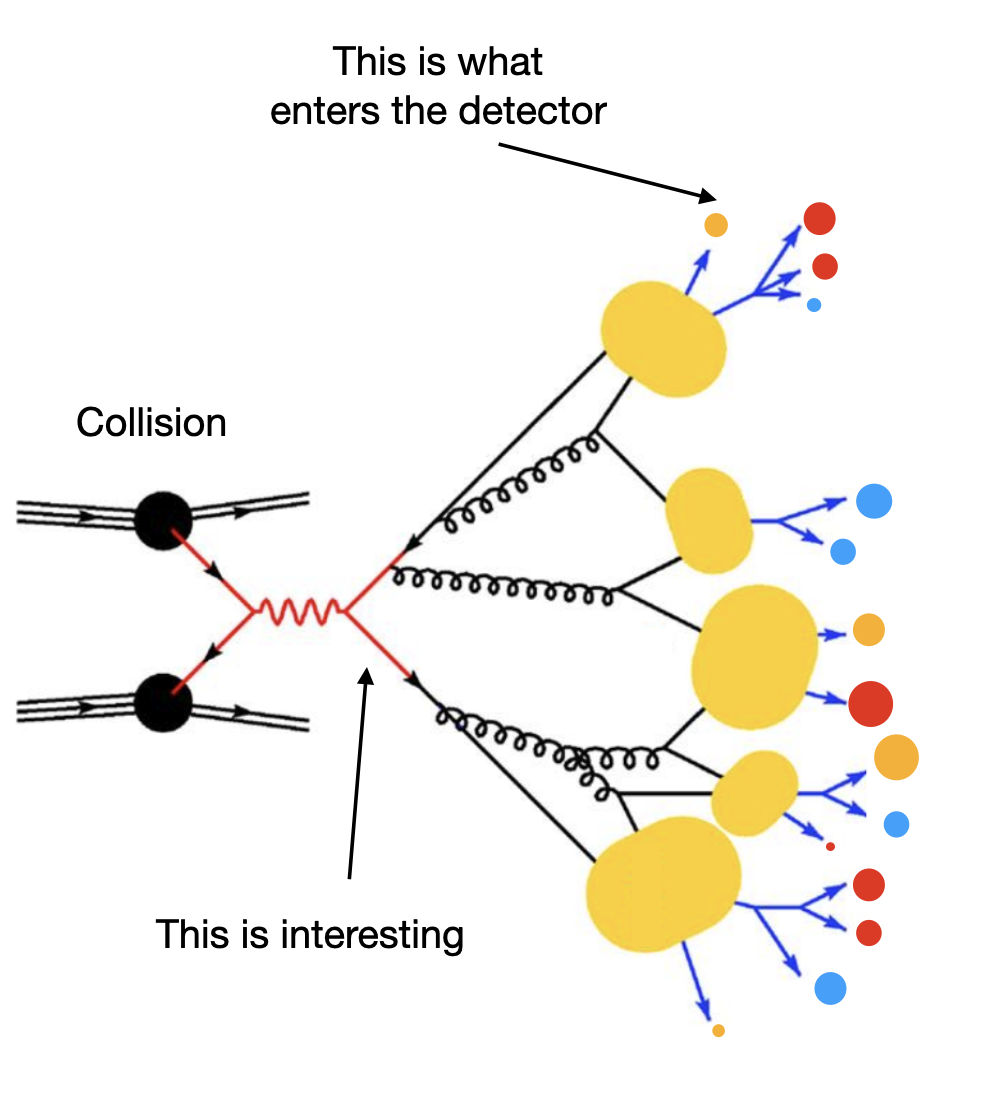

In [8]:
display(Image(filename='img/showering.png', embed=True, width=400))

### 1.4 Jets and coordinate system

Since a single fundamental particle causes a collimated spray of particles it evolves into a cone-like shape while passing through the detector. The whole detector response can be split into parts by identifying these cones. We call them *jets*. The following image shows the detector response of a single jet. 


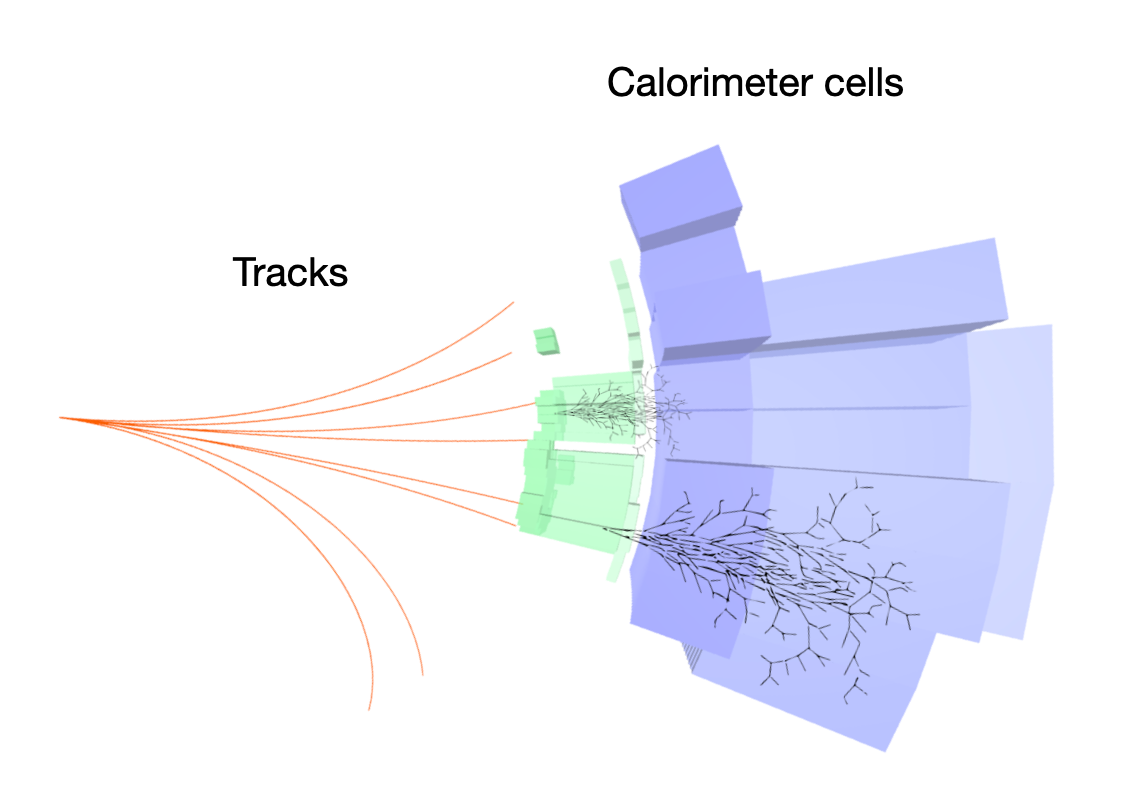

In [10]:
display(Image(filename='img/jet_detector.png', embed=True, width=500))

Before finally moving to the dataset, few words need to be said about how we describe the data. Each particle flying through the detector is usually described by it's **transverse momentum** $p_T$, the **pseudorapidity** $\eta$ and the azimuthal angle $\phi$. The quantities are illustrated with respect to the detector below. The transverse momentum is the component of the particle's momentum that goes orthogonal with respect to the beam axis $z$. The pseudorapidity is closely related to the polar angle, it is 0 if the particle's direction is orthogonal to the beam axis, and infinity if it is parallel. 

The same quantities are used to describe the jet by defining a *jet axis* that goes through the center of the jet cone. For jets we also consider the mass of a jet which can be obtained from the energy and moment relation $E^2=m^2+p^2$.


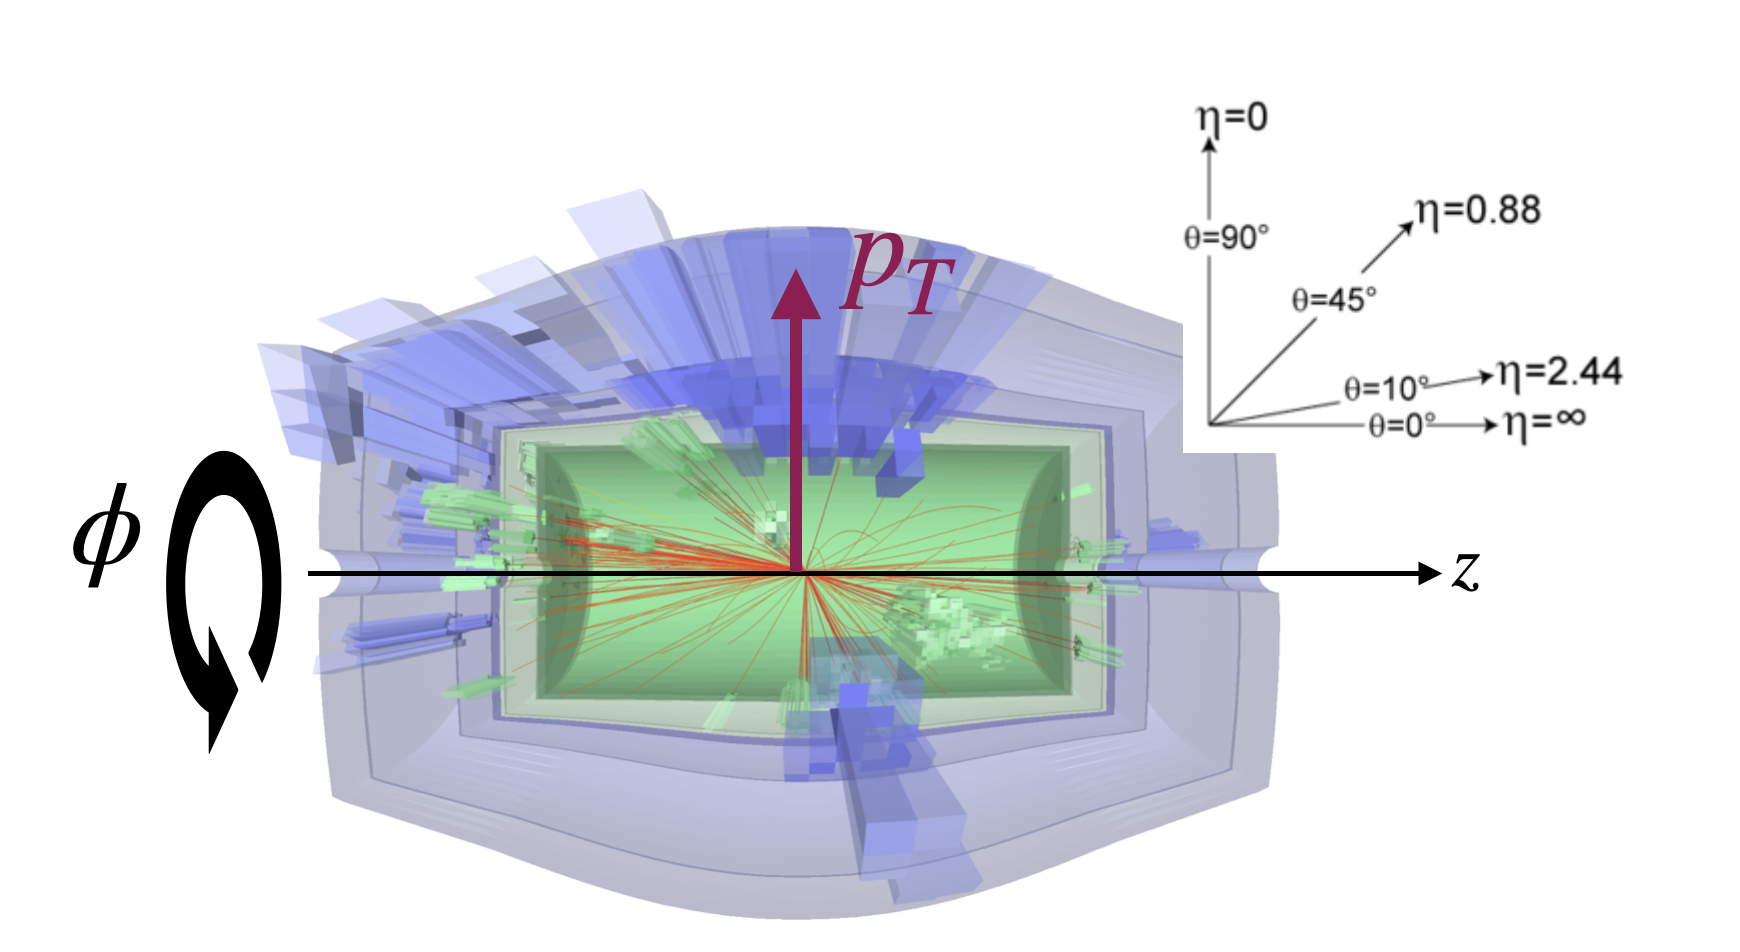

In [11]:
display(Image(filename='img/detector_coordinates.png', embed=True, width=600))

## 2. Jet Dataset

The dataset we will use is publically available at https://zenodo.org/records/6975118 . Each file contains one jet type. In total we have gluon (g), light quark (q), top quark (t), W- and Z-boson (W,Z) jets. Light quarks are in general not distinguishable among themselves due to their comparable mass, instead top quarks, decay into light quarks and are therefore easily distinguishable from other quarks. W- and Z-bosons decay in two light quarks.


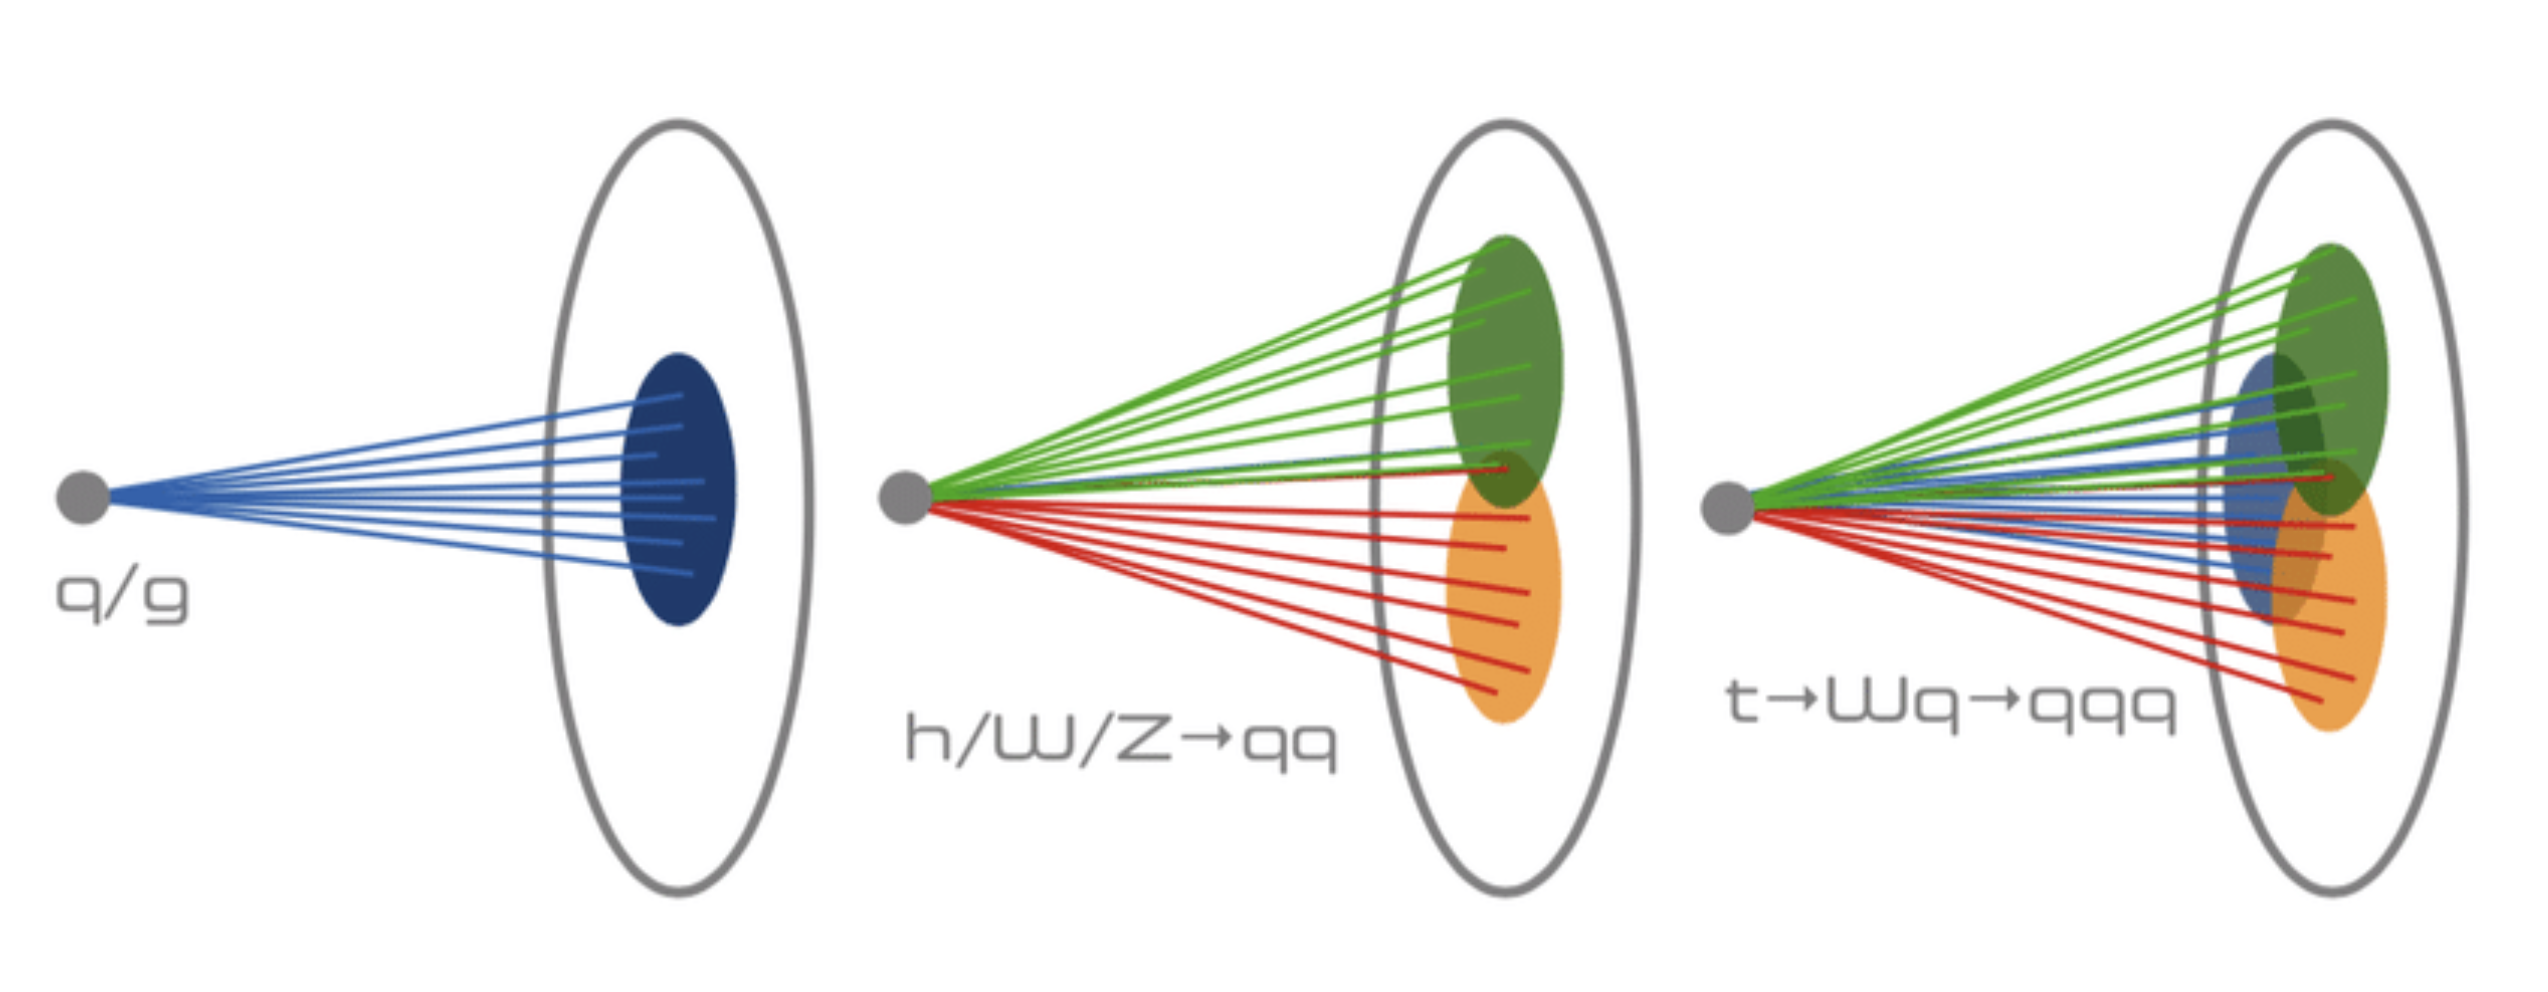

In [13]:
display(Image(filename='img/jets_structure.png', embed=True, width=600))

After downloading the dataset we can load the files individually using the h5py package (install with 'pip install h5py') and get familiar with the data structures.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f_q = h5py.File('dataset/q.hdf5', 'r')

In [3]:
f_q.keys()

<KeysViewHDF5 ['jet_features', 'particle_features']>

In [4]:
jet_feat_q = f_q['jet_features']
par_feat_q = f_q['particle_features']
print(jet_feat_q.shape)
print(par_feat_q.shape)

(170679, 4)
(170679, 30, 4)


The data set has 2 structures. First, the jet features which have the shape (N_jets, 4) and 4 are the jet features $(p_T,\eta, mass,\#\,particles)$. Second, the particle features, these are the features of the jet constituents. We have up to 30 particles in a jet therefore the particles are 0-padded to have the shape (N_jets, N_max_particles, 4). 4 is here $(\eta_{rel},\phi_{rel},p_{T,rel},mask)$. The features are given relative to the jet $\eta_{rel} = \eta_{particle} -\eta_{jet}$, $\phi_{rel} = \phi_{particle} -\phi_{jet}$ and $p_{T,rel} = p_{T,particle} / p_{T,jet}$. The mask indicating which constituents are real and which are 0-padded.


 ### Exercise 1
 
Load also the other files and plot a few histograms comparing the given quantities for different jet types:
- jet mass
- jet $p_T$
- jet $\eta$
- N particles per jet

- particle $p_{T,rel}$ 
- particle $\eta_{rel}$ 
- particle $\phi_{rel}$ 

Tip: you might consider log scale for some of them

Also note that the mass and momentum are given in units of GeV, a common unit used in particle physics. The angles are unit-less.

What would you say is the most discriminative jet variable? 
How would you qualitatively describe the different jet types with the given information?




### 2.1 Substructure

From the features looked at above we might get a feeling for how certain jets behave on average, but given the quantities for a specific jet we can't say with certainty what typ of jet we are looking at. 

More interesting than these quantities per se, is the internal structure of the jets or how the constituents are arranged. From the Standard Model we know that top-quarks decay into 3 lighter quarks, W- and Z-bosons in 2 light quarks. So in principal their internal structure being 3-prong or 2-prong should be very different from each other and esspecially from the single quark or gluon jets which are more likely to be 1-prong. 

To capture this behavior we can look at the $N$-Subjettiness $\tau_N$. It is a measure of how well the jet can be splitted into $N$ subjets. 

It is defined as 

$$
\tau_N = \frac{1}{d_0}\sum_k p_{T,k} \min\{\Delta R_{1,k},\Delta R_{2,k},...,\Delta R_{N,k}\}
$$

where $k$ runs over all particles in the jet and $\Delta R_{J,k}$ is the spatial angular distance between particle $k$ and subjet $J$. $d_0$ is a normalization given by:

$$
d_0 = \sum_k p_{T,k} R_0 
$$
Where $R_0$ is the original jet radius ($R_0=0.8$ in this dataset).

First we have to obtain the subjets of a jet. For that we can use clustering algorithms implemented by the *FastJet* package.

In [5]:
import fastjet as fj
import awkward as ak
import vector
vector.register_awkward()

For the clustering it is best to convert the particle features given relative to the jet into absolute features (only $p_T$ and $\eta$, $\phi$ is not given for the jet as the system is symmetrical in this coordinate).

In [6]:
particles_q = np.array(par_feat_q[:1000,:,:]) # take the first 1000 jets
particles_q[:,:,0] = particles_q[:,:,0] + jet_feat_q[:1000,1].repeat(30).reshape(1000,30) # rescale eta
particles_q[:,:,2] = particles_q[:,:,2] * jet_feat_q[:1000,0].repeat(30).reshape(1000,30) # rescale pT

In [7]:
# here we bring the jet constituents into the format with which the cluster algorithm works
# note we ommit adding the 0-padded particles

jet_array_q = []
for i in range(len(particles_q)):
    jet_array_q.append(ak.Array( [{'pt': x[2], 
                                  'eta': x[0],
                                  'phi': x[1],
                                  'mass': 500} for x in particles_q[i][:int(jet_feat_q[i,3])]],
                                with_name="Momentum4D"))

In [8]:
# this is the jet clustering 

jetDef = fj.JetDefinition(fj.kt_algorithm, 0.4) # this defines the clustering parameters

cluster_q = [fj.ClusterSequence(jet, jetDef) for jet in jet_array_q] 

#--------------------------------------------------------------------------
#                         FastJet release 3.4.1
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


After clustering we can extract the jet properties specifying how many subjets we want.

In [12]:
cluster_q[0].exclusive_jets(2) # we specify N = 2

<MomentumArray4D [{px: 380, py: -14.6, ...}, {...}] type='2 * Momentum4D[px...'>

In [13]:
print(cluster_q[0].exclusive_jets(2)[0].pt) # printing the pt of the first jet
print(cluster_q[0].exclusive_jets(2)[1].pt) # printing the pt of the second jet
print(cluster_q[0].exclusive_jets(2)[0].phi) # printing the phi of the first jet


380.157247766102
679.3746273815153
-0.03836058524417968


In [14]:
# lets define the N-subjetiness function 

def n_subjetiness(jets, particles):

    tau_n = 0

    for k in range(len(particles)):

        dR_Jk = [ np.sqrt( (jet.eta - particles[k,0]) **2 + (jet.phi - particles[k,1]) **2 ) for jet in jets]

        tau_n += np.min(dR_Jk) * particles[k,2]

    d0 = np.sum(particles[:,2] ) * 0.8

    return tau_n / d0

In [15]:
# we give the clustered jets and the particles to the function

tau_1_q = [n_subjetiness(cluster.exclusive_jets(1), particles) for cluster, particles in zip(cluster_q, particles_q)]
tau_2_q = [n_subjetiness(cluster.exclusive_jets(2), particles) for cluster, particles in zip(cluster_q, particles_q)]
tau_3_q = [n_subjetiness(cluster.exclusive_jets(3), particles) for cluster, particles in zip(cluster_q, particles_q)]


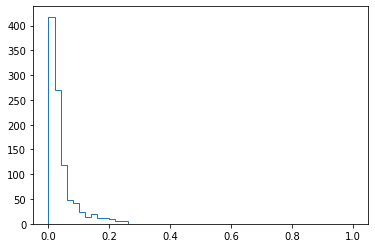

In [ ]:
plt.hist(tau_1_q, bins = 50, range = (0,1), histtype='step')
plt.show()

### Exercise 2 

Get the N_subjetiness $\tau_1$, $\tau_2$ and $\tau_3$ for the other jet types as well. Because the n_subjetiness function takes time it is okay if you look only at 1000 jets. 

Make histograms for these variables and look also at the ratios $\tau_2/\tau_1$ and $\tau_3/\tau_2$. 

What do you think? 